<div style="border:solid steelblue 1px; padding: 20px">
    
<font size="4"><p style="text-align:center"><b>Предсказание коэффициента восстановления золота из золотосодержащей руды ⛏️</b></p></font>

</div>

# Содержание
1. [Описание данных](#Описание_данных)
2. [EDA](#EDA)
3. [Проверка расчета эффективности](#Проверка_расчета_эффективности) 
4. [Признаки, недоступные в тестовой выборке](#Признаки,_недоступные_в_тестовой_выборке) 
5. [Предобработка данных](#Предобработка_данных) 
6. [Изменение концентрация металлов (Au, Ag, Pb) на различных этапах очистки](#Изменение_концентрация_металлов_(Au,_Ag,_Pb)_на_различных_этапах_очистки) 
7. [Сравнение распределения размеров гранул сырья](#Сравнение_распределения_размеров_гранул_сырья)
8. [Исследование суммарной концентрации всех веществ на разных стадиях](#Исследование_суммарной_концентрации_всех_веществ_на_разных_стадиях)
9. [Функция для вычисления sMAPE](#Функция_для_вычисления_sMAPE)
10. [Обучение модели](#Обучение_модели)
11. [Вывод](#Вывод)

<div class="alert alert-info">
<font size="4", color = "black"><a name="Описание_данных"><h3>Описание данных</h3></a></font>
    <br /> 
    <font size="3", color = "black">

<div class="alert alert-info">
<font size="4", color = "black">📌 Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> 
    
Вижу твое добавленное описание проекта. Молодец! Это поможет тебе расставлять акценты в выводах.

<div class="alert alert-info">
<font size="4", color = "black"><a name="EDA"><h3>EDA</h3></a></font>
    <br /> 
    <font size="3", color = "black">

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_predict


In [2]:
pth1 = '/datasets/gold_recovery_full_new.csv'
pth2 = 'gold_recovery_full_new.csv'
if os.path.exists(pth1):
    full = pd.read_csv(pth1)
elif os.path.exists(pth2):
    full = pd.read_csv(pth2)
else:
   print('Something is wrong')

In [3]:
pth3 = '/datasets/gold_recovery_train_new.csv'
pth4 = 'gold_recovery_train_new.csv'
if os.path.exists(pth3):
    train = pd.read_csv(pth3)
elif os.path.exists(pth4):
    train = pd.read_csv(pth4)
else:
   print('Something is wrong')

In [4]:
pth5 = '/datasets/gold_recovery_test_new.csv'
pth6 = 'gold_recovery_test_new.csv'
if os.path.exists(pth5):
    test = pd.read_csv(pth5)
elif os.path.exists(pth6):
    test = pd.read_csv(pth6)
else:
   print('Something is wrong')

In [5]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [8]:
full.duplicated().sum()

0

In [9]:
train.duplicated().sum()

0

In [10]:
test.duplicated().sum()

0

 <div class="alert alert-info">
    <font size="3", color = "black"><b>✍ Вывод</b></font>
  <br><font size="3", color = "black">
    <br>
При разведочном анализе обнаружены пропуски в данных выборках. Столбец "date" имеет тип object. В тестовой выборке отсутствуют некоторые столбцы, по сравнению с обучающей выборкой. в данных дубликатов не обнаружено.

<div class="alert alert-info">
<font size="4", color = "black"><a name="Проверка_расчета_эффективности"><h3>Проверка расчета эффективности</h3></a></font>
    <br /> 
    <font size="3", color = "black">

<div class="alert alert-info">
<font size="4", color = "black">📌Расчет эффективности посчитаем по следующей формуле:
    $$RECOVERY = \frac{С\cdot(F - T)}{F\cdot(C - T)}\cdot100\% $$

In [11]:
def RECOVERY(value):
    C = value['rougher.output.concentrate_au']
    F = value['rougher.input.feed_au']
    T = value['rougher.output.tail_au']
    RECOVERY = (C*(F-T))/(F*(C-T))*100
    return RECOVERY

In [12]:
train['rougher.output.recovery_verification'] = train.apply(RECOVERY, axis=1) # применим функцию

In [13]:
mean_absolute_error(train['rougher.output.recovery_verification'], train['rougher.output.recovery'])

9.73512347450521e-15

 <div class="alert alert-info">
    <font size="3", color = "black"><b>✍ Вывод</b></font>
  <br><font size="3", color = "black">
    <br>
Расчет эффективности рассчитан правильно. Найден MAE между теоретическими расчётами и значением признака. MAE стремиться к 0, что говорит о том, что расчет эффективности рассчитан верно.

<div class="alert alert-info">
<font size="4", color = "black"><a name="Признаки,_недоступные_в_тестовой_выборке"><h3>Признаки, недоступные в тестовой выборке</h3></a></font>
    <br /> 
    <font size="3", color = "black">

In [14]:
not_columns_test = train.drop(test.columns,axis=1)

In [15]:
not_columns_test.columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

 <div class="alert alert-info">
    <font size="3", color = "black"><b>✍ Вывод</b></font>
  <br><font size="3", color = "black">
    <br>
Из анализа таблицы test следует, что в нем содержится меньше столбцов, по сравнению с обучающей таблицей. В тестововой выборке отсутствуют финальные концентрации металлов, финальные отавлаьные хвосты, концентрации металлов при первичной очистке, отвальные хвосты при первичной и вторичной очистках, флотация, расчетные и выходные характеристики процесса, а также целевые признаки. Некоторые данные являются не определенными параметрами при начале технологического процесса и не могут находиться в тестовой выборке.

<div class="alert alert-info">
<font size="4", color = "black"><a name="Предобработка_данных"><h3>Предобработка данных</h3></a></font>
    <br /> 
    <font size="3", color = "black">

 <div class="alert alert-info">
    <font size="3", color = "black"><b>✍ Комментарий</b></font>
  <br><font size="3", color = "black">
    <br>
Соседние параметры по дате и времени часто похожи. Исходя из этого, применим KNNImputer при заполении пропусков.

In [16]:
imputer = KNNImputer()

In [17]:
# заполнение пропусков в исходной выборке
full.loc[:, full.columns != 'date'] = imputer.fit_transform(full.loc[:, full.columns != 'date'])
# заполнение пропусков в обучающей выборке
train.loc[:, train.columns != 'date'] = imputer.fit_transform(train.loc[:, train.columns != 'date'])
# заполнение пропусков в обучающей выборке
test.loc[:, test.columns != 'date'] = imputer.fit_transform(test.loc[:, test.columns != 'date'])

In [18]:
full['date'] = pd.to_datetime(full['date'], format="%Y-%m-%dT%H:%M:%S")
train['date'] = pd.to_datetime(train['date'], format="%Y-%m-%dT%H:%M:%S")
test['date'] = pd.to_datetime(test['date'], format="%Y-%m-%dT%H:%M:%S")

 <div class="alert alert-info">
    <font size="3", color = "black"><b>✍ Вывод</b></font>
  <br><font size="3", color = "black">
    <br>
    <ul>
 <li>При заполнении пропусков применен KNNImputer.</li>
<li>Тип столбца 'date' изменен.</li>
</ul>


<div class="alert alert-info">
<font size="4", color = "black"><a name="Изменение_концентрация_металлов_(Au,_Ag,_Pb)_на_различных_этапах_очистки"><h3>Изменение концентрация металлов (Au, Ag, Pb) на различных этапах очистки</h3></a></font>
    <br /> 
    <font size="3", color = "black">


In [19]:
metals = ['au', 'ag', 'pb']

metal_columns = []
for col in list(train.columns):
    for Me in metals:
        if Me in col.split('_') and col.find('rougher.calculation.') == -1 and col.find('tail') == -1:
            metal_columns.append(col)

metal_columns

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_au']

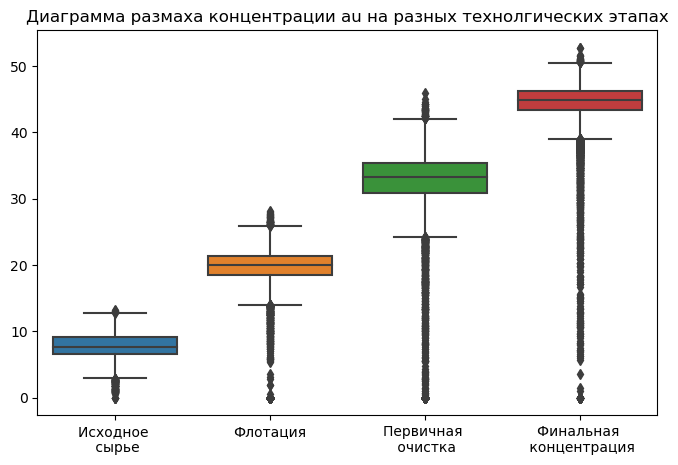

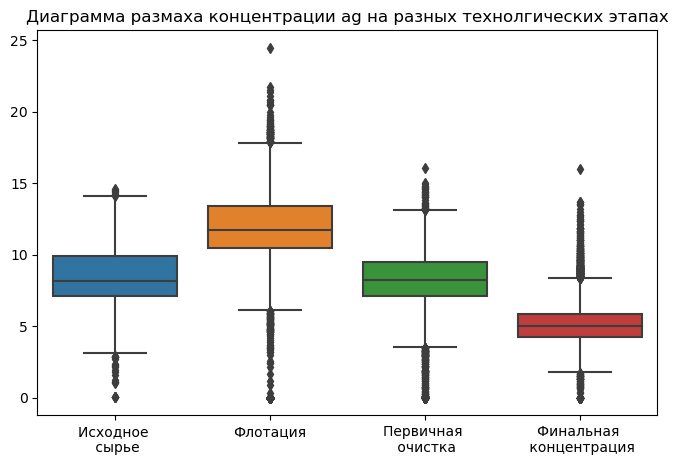

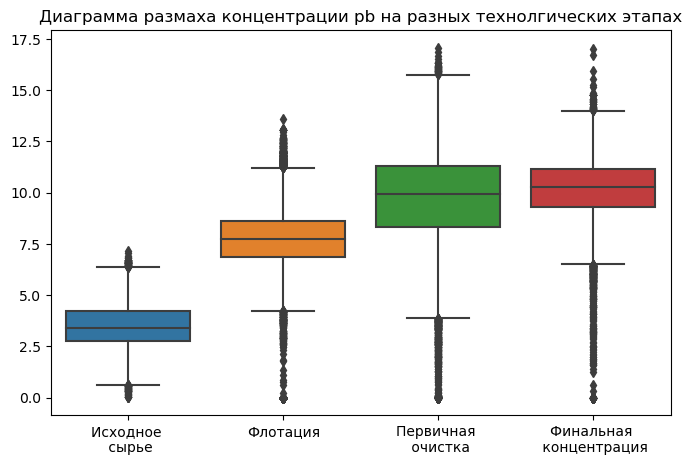

In [20]:
metals = ['au', 'ag', 'pb']
for Me in list(metals): 
# цикл для формирования диаграмм размаха концентраций элементов Au, Ag, Pb на различных этапах очистки
    plt.figure(figsize=(8,5))
    plt.title('Диаграмма размаха концентрации {} на разных технолгических этапах'.format(Me))
    sns.boxplot(data=train[['rougher.input.feed_{}'.format(Me),
                            'rougher.output.concentrate_{}'.format(Me),
                            'primary_cleaner.output.concentrate_{}'.format(Me),
                            'final.output.concentrate_{}'.format(Me)]])
    plt.xticks([0,1,2,3], ['Исходное \n сырье', 'Флотация', 'Первичная \n очистка', 'Финальная \n концентрация'])
    plt.show()

 <div class="alert alert-info">
    <font size="3", color = "black"><b>✍ Вывод</b></font>
  <br><font size="3", color = "black">
    <br>
На графиках представлены диаграммы размаха концентраций золота, серебра и свинца на разных технологических этапах. Наблюдается рост концентрации золота и свинца на каждом этапе, что говорит об эффективности этих процессов. Однако, концентрация серебра после этапа флотации снижается. Финальная концентрация золота и свинца примерно в 5,8 и 2,7 раза выше соответственно, чем концентрация в исходном сырье.

<div class="alert alert-info">
<font size="4", color = "black"><a name="Сравнение_распределения_размеров_гранул_сырья"><h3>Сравнение распределения размеров гранул сырья</h3></a></font>
    <br /> 
    <font size="3", color = "black">

In [21]:
size_columns = []
for col in list(train.columns):
    if col.find('feed_size') != -1:
        size_columns.append(col)
size_columns

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

In [22]:
size_columns_test = []
for col in list(test.columns):
    if col.find('feed_size') != -1:
        size_columns_test.append(col)
size_columns_test

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

/Users/moonkerimka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


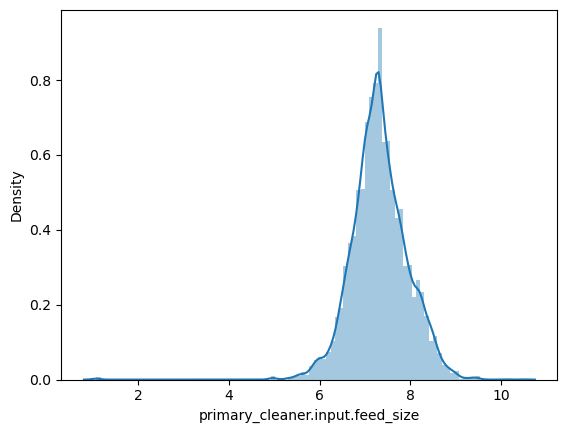

/Users/moonkerimka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


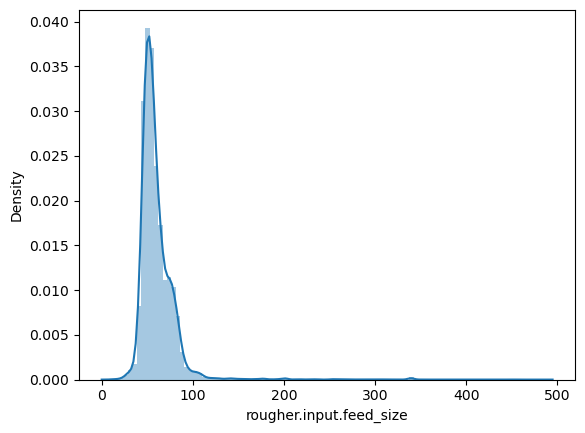

In [23]:
for i in size_columns:
    sns.distplot(train[i], bins=100, kde=True)
    plt.show()

/Users/moonkerimka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


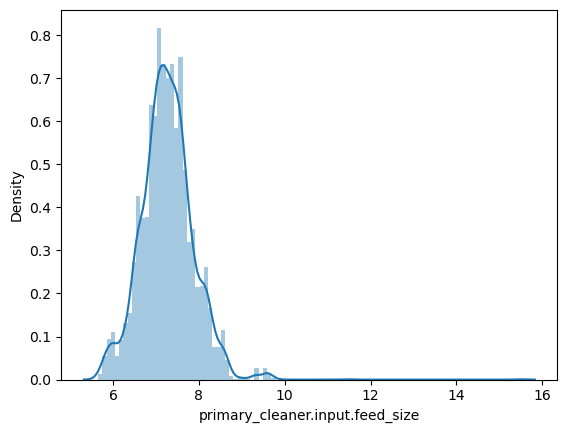

/Users/moonkerimka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


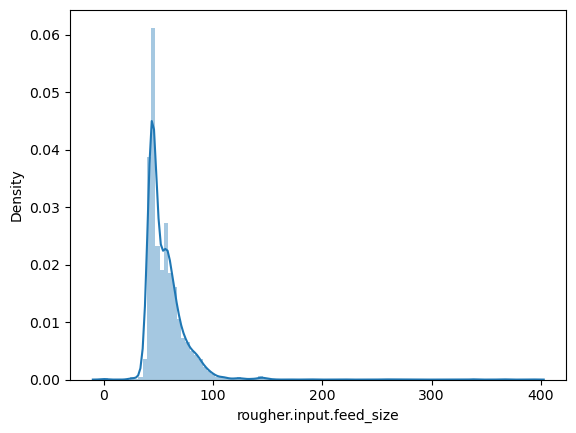

In [24]:
for i in size_columns_test:
    sns.distplot(test[i], bins=100, kde=True)
    plt.show()

 <div class="alert alert-info">
    <font size="3", color = "black"><b>✍ Вывод</b></font>
  <br><font size="3", color = "black">
    <br>
На обучающей и тестовой выборке размеры гранул сырья близки. 

<div class="alert alert-info">
<font size="4", color = "black"><a name="Исследование_суммарной_концентрации_всех_веществ_на_разных_стадиях"><h3>Исследование суммарной концентрации всех веществ на разных стадиях</h3></a></font>
    <br /> 
    <font size="3", color = "black">

In [25]:
train['sum_concetration_rougher_input'] = (
    train['rougher.input.feed_au'] +
    train['rougher.input.feed_ag'] + 
    train['rougher.input.feed_pb']
)

train['sum_concetration_rougher_output'] = (
    train['rougher.output.concentrate_au'] +
    train['rougher.output.concentrate_ag'] +
    train['rougher.output.concentrate_pb']
)
train['sum_concetration_primary_cleaner'] = (
    train['primary_cleaner.output.concentrate_au'] +
    train['primary_cleaner.output.concentrate_ag'] +
    train['primary_cleaner.output.concentrate_pb']
)
train['sum_concetration_final'] = (
    train['final.output.concentrate_au'] +
    train['final.output.concentrate_ag'] +
    train['final.output.concentrate_pb']
)


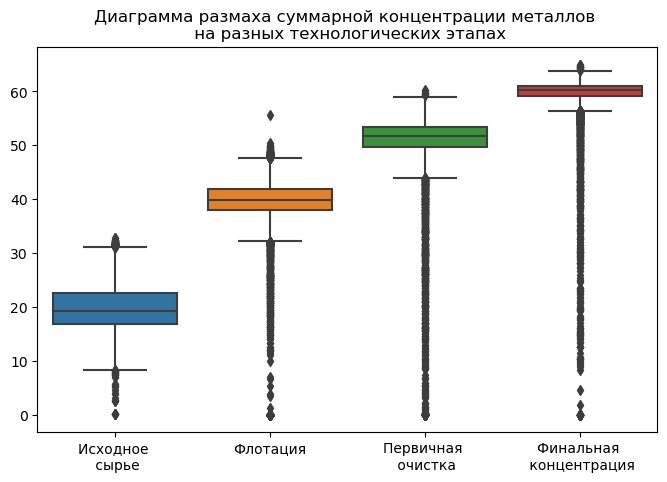

In [26]:
plt.figure(figsize=(8,5))
plt.title('Диаграмма размаха суммарной концентрации металлов \n на разных технологических этапах')
sns.boxplot(data=train[['sum_concetration_rougher_input',
                        'sum_concetration_rougher_output',
                        'sum_concetration_primary_cleaner',
                        'sum_concetration_final']])
plt.xticks([0,1,2,3], ['Исходное \n сырье', 'Флотация', 'Первичная \n очистка', 'Финальная \n концентрация'])
plt.show()

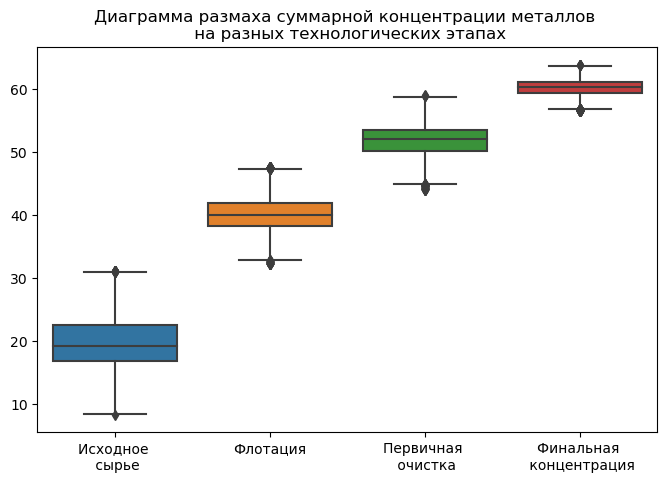

In [27]:
#фильтрации аномалий
Q1 = train[['sum_concetration_rougher_input',
            'sum_concetration_rougher_output',
            'sum_concetration_primary_cleaner',
            'sum_concetration_final']].quantile(0.25)
Q3 = train[['sum_concetration_rougher_input',
            'sum_concetration_rougher_output',
            'sum_concetration_primary_cleaner',
            'sum_concetration_final']].quantile(0.75)
IQR = Q3 - Q1
data_IQR = train[(train[['sum_concetration_rougher_input',
                         'sum_concetration_rougher_output',
                         'sum_concetration_primary_cleaner',
                         'sum_concetration_final']] 
            > (Q1-1.5*IQR)) & (train[['sum_concetration_rougher_input',
                                      'sum_concetration_rougher_output',
                                      'sum_concetration_primary_cleaner',
                                      'sum_concetration_final']] 
                               < (Q3+1.5*IQR))]
plt.figure(figsize=(8,5))
plt.title('Диаграмма размаха суммарной концентрации металлов \n на разных технологических этапах')
sns.boxplot(data=data_IQR[['sum_concetration_rougher_input',
                            'sum_concetration_rougher_output',
                            'sum_concetration_primary_cleaner',
                            'sum_concetration_final']])
plt.xticks([0,1,2,3], ['Исходное \n сырье', 'Флотация', 'Первичная \n очистка', 'Финальная \n концентрация'])
plt.show()

 <div class="alert alert-info">
    <font size="3", color = "black"><b>✍ Вывод</b></font>
  <br><font size="3", color = "black">
    <br>
На обучающей выборке при построении диаграммы размаха наблюдается рост концентрации металлов при различных технологических этапах в 3 раза. На диаграммах размаха удалены аномалии. 

<div class="alert alert-info">
<font size="4", color = "black"><a name="Функция_для_вычисления_sMAPE"><h3>Функция для вычисления sMAPE</h3></a></font>
    <br /> 
    <font size="3", color = "black">

<div class="alert alert-info">
<font size="4", color = "black">📌Расчитаем метрику по следующей формуле:
    $$sMAPE = \frac{1}{N}\sum\limits_{i=1}^n\frac{|y_{i} - \overline{y_{i}}|}{(|y_{i}| + |\overline{y_{i}}|)/2}\cdot100\% $$
         $$EndsMAPE = 25\%\cdot sMAPE(rougher) +  75\%\cdot sMAPE(final)$$

In [28]:
def smape(target_rougher, predict_rougher, target_final, predict_final):
    smape_rougher = 100/len(target_rougher) * np.sum(abs(target_rougher - predict_rougher) / ((abs(target_rougher) 
                                                                            + abs(predict_rougher))/2))
    smape_final = 100/len(target_final) * np.sum(abs(target_final - predict_final) / ((abs(target_final) 
                                                                            + abs(predict_final))/2))
    return 0.25*(smape_rougher) + 0.75*(smape_final)

<div class="alert alert-info">
<font size="4", color = "black"><a name="Обучение_модели"><h3>Обучение модели</h3></a></font>
    <br /> 
    <font size="3", color = "black">

In [29]:
train.set_index('date', inplace=True)
full.set_index('date', inplace=True)
test.set_index('date', inplace=True)

In [30]:
#добавим в тестовую выборку целевые признаки
test['rougher.output.recovery'] = full['rougher.output.recovery']
test['final.output.recovery'] = full['final.output.recovery']

In [31]:
#удалим в обучающей выборке столбцы, которых нет в тестовой
train = train.drop(set(train.columns) - set(test.columns), axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

 <div class="alert alert-info">
    <font size="3", color = "black"><b>✍ Комментарий</b></font>
  <br><font size="3", color = "black">
    <br>
В тестовую выборку добавлены целевые признаки. В обучающей выборки удалены столбцы, которых нет в тестовой выборке.

In [32]:
#деление выборок на признаки и целевые признаки
features_train_rougher = train.drop(['rougher.output.recovery'], axis=1)
target_train_rougher = train['rougher.output.recovery']
features_train_final = train.drop(['final.output.recovery'], axis=1)
target_train_final = train['final.output.recovery']
features_test_rougher = test.drop(['rougher.output.recovery'], axis=1)
target_test_rougher = test['rougher.output.recovery']
features_test_final = test.drop(['final.output.recovery'], axis=1)
target_test_final = test['final.output.recovery']

 <div class="alert alert-info">
    <font size="3", color = "black">Модель дерева решений</font>
  <br><font size="3", color = "black">

In [33]:
for depth in tqdm(range(1, 5)):
    model = tree.DecisionTreeRegressor(random_state=12345, max_depth = depth)
    y_pred_1 = cross_val_predict(model, features_train_rougher, target_train_rougher, cv=5)
    y_pred_2 = cross_val_predict(model, features_train_final, target_train_final, cv=5)
    print('depth',depth)
    print('Итоговое sMAPE:',smape(target_train_rougher, y_pred_1, target_train_final, y_pred_2))
print()

 25%|███████████▎                                 | 1/4 [00:00<00:01,  1.57it/s]

depth 1
Итоговое sMAPE: 10.621538921681855


 50%|██████████████████████▌                      | 2/4 [00:01<00:01,  1.06it/s]

depth 2
Итоговое sMAPE: 9.878086030347468


 75%|█████████████████████████████████▊           | 3/4 [00:03<00:01,  1.26s/it]

depth 3
Итоговое sMAPE: 10.07726314210818


100%|█████████████████████████████████████████████| 4/4 [00:05<00:00,  1.35s/it]

depth 4
Итоговое sMAPE: 11.434114744452447



 <div class="alert alert-info">
    <font size="3", color = "black">Модель случайного леса</font>
  <br><font size="3", color = "black">

In [34]:
for depth in tqdm(range(1, 3)):
    print('depth',depth)
    for est in range(10, 31, 10):
        model = RandomForestRegressor(random_state=12345, max_depth=depth, n_estimators = est)
        y_pred_1 = cross_val_predict(model, features_train_rougher, target_train_rougher, cv=5)
        y_pred_2 = cross_val_predict(model, features_train_final, target_train_final, cv=5)
        print('Количество деревьев:', est)
        print('Итоговое sMAPE:',smape(target_train_rougher, y_pred_1, target_train_final, y_pred_2))
    print()
    
print()


  0%|                                                     | 0/2 [00:00<?, ?it/s]

depth 1
Количество деревьев: 10
Итоговое sMAPE: 10.282771435941136
Количество деревьев: 20
Итоговое sMAPE: 10.295574634097186


 50%|██████████████████████▌                      | 1/2 [00:19<00:19, 19.50s/it]

Количество деревьев: 30
Итоговое sMAPE: 10.294945564596183

depth 2
Количество деревьев: 10
Итоговое sMAPE: 9.654949914905455
Количество деревьев: 20
Итоговое sMAPE: 9.658258283758965


100%|█████████████████████████████████████████████| 2/2 [00:57<00:00, 28.51s/it]

Количество деревьев: 30
Итоговое sMAPE: 9.665885795199827




 <div class="alert alert-info">
    <font size="3", color = "black">Модель линейной регрессии</font>
  <br><font size="3", color = "black">

In [35]:
%%time
model = LinearRegression()
y_pred_1 = cross_val_predict(model, features_train_rougher, target_train_rougher, cv=5)
y_pred_2 = cross_val_predict(model, features_train_final, target_train_final, cv=5)
print('Итоговое sMAPE:',smape(target_train_rougher, y_pred_1, target_train_final, y_pred_2))

Итоговое sMAPE: 12.170157318546561
CPU times: user 695 ms, sys: 413 ms, total: 1.11 s
Wall time: 302 ms


 <div class="alert alert-info">
    <font size="3", color = "black"><b>✍ Комментарий</b></font>
  <br><font size="3", color = "black">
    <br>
Финальные параметры выбранной модели RandomForestClassifier(random_state=12345, n_estimators=10, max_depth=2), т.к. с такими гиперпараметрами получено низкое значение итогового sMAPE.

 <div class="alert alert-info">
    <font size="3", color = "black">Проверка на тестовой выборке</font>
  <br><font size="3", color = "black">

In [36]:
model_1 = RandomForestRegressor(max_depth=2, n_estimators=10, random_state=12345)
model_2 = RandomForestRegressor(max_depth=2, n_estimators=10, random_state=12345)
model_1.fit(features_train_rougher, target_train_rougher)
model_2.fit(features_train_final, target_train_final)
predicted_rougher = model_1.predict(features_test_rougher)
predicted_final = model_2.predict(features_test_final)
print('Итоговое sMAPE:', smape(target_test_rougher, predicted_rougher, target_test_final, predicted_final))

Итоговое sMAPE: 10.31579655418583


/Users/moonkerimka/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/moonkerimka/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


 <div class="alert alert-info">
    <font size="3", color = "black">Проверка модели на адекватность</font>
  <br><font size="3", color = "black">

In [37]:
dummy_regr_1 = DummyRegressor(strategy="mean")
dummy_regr_2 = DummyRegressor(strategy="mean")
dummy_regr_1.fit(features_train_rougher, target_train_rougher)
dummy_regr_2.fit(features_train_final, target_train_final)
y_pred_1 = dummy_regr_1.predict(features_test_rougher)
y_pred_2 = dummy_regr_2.predict(features_test_final)
smape(target_test_rougher, y_pred_1, target_test_final, y_pred_2)

10.289630376021035

<div class="alert alert-info">
<font size="4", color = "black"><a name="Вывод"><h3>Вывод</h3></a></font>
    <br /> 
    <font size="3", color = "black">

 <div class="alert alert-info">
    <font size="3", color = "black">
<br>Было проведено исследование, чтобы <b> предсказать коэффициент восстановления золота из золотосодержащей руды. </b>
        
<br><b> Входные данные </b> - данные с параметрами добычи и очистки.
        
<br> В тестовой выборке меньше столбцов, чем в обучающей выборке, потому что отсутствующие столбцы явлются не определенными параметрами при начале технологического процесса и не могут находиться в тестовой выборке.
        
<br> При заполнении пропусков применен KNNImputer.   
        
<br> На графиках представлены диаграммы размаха концентраций золота, серебра и свинца на разных технологических этапах. Наблюдается рост концентрации золота и свинца на каждом этапе, что говорит об эффективности этих процессов. Однако, концентрация серебра после этапа флотации снижается. Финальная концентрация золота и свинца примерно в 5,8 и 2,7 раза выше соответственно, чем концентрация в исходном сырье.

<br> На обучающей и тестовой выборке размеры гранул сырья близки.    

<br> На обучающей выборке при построении диаграммы размаха наблюдается рост концентрации металлов при различных технологических этапах в 3 раза. 
        
<br>Были обучены модели линейной регрессии, дерева решений и случайного леса. 
        <br><b>Какая модель лучше?</b>
<br>У каждой — свои достоинства и недостатки. 
<br>У алгоритма классификации - случайный лес, высокое качество (accuracy), но медленная скорость.
<br>У дерева решений, качество (accuracy) ниже, чем у случайного леса, но высокая скорость работы.
<br>У линейной регрессии самое низкое качество (accuracy), но высокая скорость работы.
        
<br><b> Финальные параметры выбранной модели RandomForestClassifier(random_state=12345, n_estimators=10, max_depth=2).</b>
 
<br><b>Проведена проверка финальной модели тестовой выборкой. </b>
